这个notebook的内容基本来自 https://dynamics-and-control.readthedocs.io/en/latest/0_Getting_Started/Notebook%20introduction.html 。https://www.sympy.org/scipy-2017-codegen-tutorial/notebooks/01-intro-sympy.html 这里也有很好的说明

In [1]:
import sympy
sympy.__version__

'1.10.1'

用`Symbol`定义变量，`symbols`定义多个变量。可以基于变量定义函数，也可以用`Function`定义未知的函数

In [2]:
h = sympy.Function('h')  # This is how to specify an unknown function in sympy
x = sympy.Symbol('x', positive=True)
alpha1, omega_2 = sympy.symbols('alpha1 omega_2') # sympy能够自动解析希腊字母名以及数字下标
trial = h(x).diff(x) - alpha1*h(x).diff(x,2) + h(x).integrate(x) + omega_2
trial

-alpha1*Derivative(h(x), (x, 2)) + omega_2 + Derivative(h(x), x) + Integral(h(x), x)

用`sympify`把字符串转换为函数

In [3]:
str = "x**2 + 3*x - 1/2"
str_exp = sympy.sympify(str)
str_exp

x**2 + 3*x - 1/2

还可以用lambdify构建lambda函数

In [4]:
import numpy 
a = numpy.arange(10) 
expr = sympy.sin(x)
f = sympy.lambdify(x, expr, "numpy") 
f(a) 

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

函数可以展开

In [5]:
polynomial = (2*x + 3)**4
polynomial.expand()

16*x**4 + 96*x**3 + 216*x**2 + 216*x + 81

可以分解因式

In [6]:
(x**2+4*x+3).factor()

(x + 1)*(x + 3)

可以化简

In [7]:
sympy.simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))

x - 1

可以求微分

In [8]:
eq = sympy.tan(sympy.log(x**2 + 1))
eq.diff(x)

2*x*(tan(log(x**2 + 1))**2 + 1)/(x**2 + 1)

可以求n阶微分

In [9]:
polynomial.diff(x, 2) # Second derivative

48*(2*x + 3)**2

可以求不定积分

In [10]:
polynomial.integrate(x) # indefinite integral - note no constant of integration is added

16*x**5/5 + 24*x**4 + 72*x**3 + 108*x**2 + 81*x

可以求定积分

In [11]:
polynomial.integrate((x, 1, 2)) # Note that integrate takes one argument which is a tuple for the definite integral

6841/5

可以求极限

In [12]:
lim = sympy.limit((2*sympy.sin(x) - sympy.sin(2*x))/(x - sympy.sin(x)), x, 0,'+')
lim

6

可以在指定点泰勒展开指定阶数

In [13]:
sympy.series(sympy.sin(x), x, 2, 7) # taylor expansion in terms of the x variable, around x=2, first order.

sin(2) + (x - 2)*cos(2) - (x - 2)**2*sin(2)/2 - (x - 2)**3*cos(2)/6 + (x - 2)**4*sin(2)/24 + (x - 2)**5*cos(2)/120 - (x - 2)**6*sin(2)/720 + O((x - 2)**7, (x, 2))

用`removeO`可以不产生O项

In [14]:
(sympy.series(sympy.sin(x), x, 2, 7)).removeO()

-(x - 2)**6*sin(2)/720 + (x - 2)**5*cos(2)/120 + (x - 2)**4*sin(2)/24 - (x - 2)**3*cos(2)/6 - (x - 2)**2*sin(2)/2 + (x - 2)*cos(2) + sin(2)

以及用`sub`方法把算式的指定部分替换成特定的值(**特别注意：这里的sin(2x)不会被展开成2cos(x)sin(x)然后把sin(x)替换掉**)

In [17]:
((x-sympy.sin(2*x))/sympy.sin(x)).subs(sympy.sin(x), 1)

x - sin(2*x)

注意`subs`输出的是数字表达式，意味着不会直接得到立即数结果，除非结果是一个精确的整数

In [18]:
x, y, z = sympy.symbols('x y z')
exp = 2*x**2+y/7+3*z
res_exp = exp.subs([(x, 2), (y, 4), (z, 1)])
res_exp

81/7

In [19]:
exp = (2*sympy.sin(x**2) - sympy.sin(2*y))/(x - sympy.sin(z))
res_exp = exp.subs([(x, 2), (y, 4), (z, 1)])
res_exp

(2*sin(4) - sin(8))/(2 - sin(1))

`evalf`可以求近似值，其可选参数包括精度位数，以及截尾`chop=True`。有变量的表达式可以以带`subs=`参数的方式调用`evalf`

In [20]:
print(res_exp.evalf())
print(res_exp.evalf(6))

one= sympy.cos(1)**2 + sympy.sin(1)**2
print((one-1).evalf())
print((one-1).evalf(chop=True))

print(exp.evalf(subs={x: 2, y: 4, z: 1}))

-2.16046659549930
-2.16047
-0.e-124
0
-2.16046659549930


把数值表达式变成普通浮点数的方式还包括`sympy.N`和`float`，其中`sympy.N`可用于带参数的表达式化简

In [21]:
print(float(res_exp))
new_exp = res_exp*sympy.sqrt(2)*sympy.pi*x
Nexp=sympy.N(new_exp)
print(Nexp)
print(new_exp)
new_exp

-2.160466595499298
-9.59870017560492*x
sqrt(2)*pi*x*(2*sin(4) - sin(8))/(2 - sin(1))


sqrt(2)*pi*x*(2*sin(4) - sin(8))/(2 - sin(1))

用`solve`解方程

In [22]:
solutions = sympy.solve(2*x**2 + 2 - 4) # 解方程 2*x**2 + 2 - 4 = 0
print(solutions)

[-1, 1]


用`Eq`构建方程然后用`roots`求解

In [23]:
equation = sympy.Eq(2*x**2 + 2, 4) # 解方程 2*x**2 + 2 = 4
sympy.roots(equation)

{-1: 1, 1: 1}

方程的解中可以包含*变量(var)*，也可以将一个*symbol*用其它*symbol*表示

In [25]:
a, b, c = sympy.var('a, b, c')
solution = sympy.solve([a*x + b*y - 2,
                        a*x - b*y - c], [x, y])
solution

{x: (c + 2)/(2*a), y: (2 - c)/(2*b)}

In [26]:
sympy.solve(x + y - z, z)

[x + y]

`plot`画图

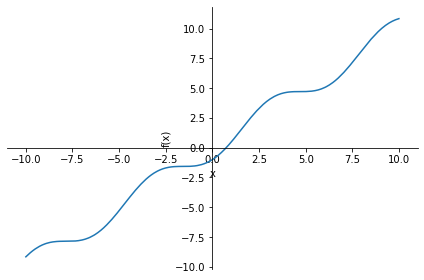

In [27]:
badeq = (x - sympy.cos(x))
sympy.plot(badeq)

对于难以求解析解的方程，可以指定初始值然后用`nsolve`求数值解

In [28]:
sympy.nsolve(badeq, x, 0.5) # 从图上看这附近有一个解

0.739085133215161

sympy也能为某些方程求解析解，使用`dsolve`

In [3]:
de = h(x)+h(x).diff(x)-2
de

h(x) + Derivative(h(x), x) - 2

In [30]:
solution = sympy.dsolve(de)
solution

Eq(h(x), C1*exp(-x) + 2)

用`latex`可以生成函数的latex表达式（要通过print输出，否则会有额外的`\`转义符）

In [5]:
print(sympy.latex(de))

h{\left(x \right)} + \frac{d}{d x} h{\left(x \right)} - 2
